# Feature Engineering for Telco Customer Churn

In [1]:
# Imports
import os
import pandas as pd
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
# Set file path
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
path = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")

100%|██████████| 172k/172k [00:00<00:00, 685kB/s]

Extracting files...


### Load and Inspect Dataset

In [3]:
df = pd.read_csv(path)

df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


### Handle Missing and Inconsistent Values

In [4]:
# Count missing values
df.isnull().sum()

# Replace empty strings with NaN and convert to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-4-281274601>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


### Drop Irrelevant Features

In [5]:
df.drop(columns=['customerID'], inplace=True)

### Encode Categorical Variables

In [6]:
# Binary encoding
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# One-hot encoding
df = pd.get_dummies(df, drop_first=True)

### Normalize Continuous Variables

In [7]:
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'totalCharges']] = scaler.fit_transform(df[
    ['tenure', 'MonthlyCharges', 'TotalCharges']
    ])

### Feature Creation

### Tenure Grouping
Customers at different lifecycle stages churn differently.

<Axes: xlabel='TenureGroup', ylabel='Churn'>

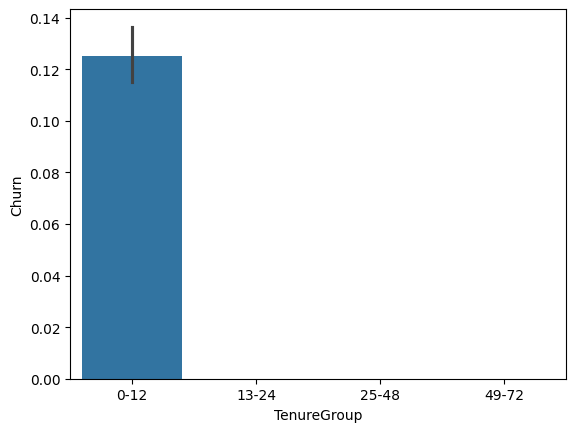

In [8]:
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-12', '13-24', '25-48', '49-72'])

# Chart
sns.barplot(x='TenureGroup', y='Churn', data=df)

In [13]:
# Average Monthly Charges
df['AvgMonthlyCharges'] = df['TotalCharges'] / (df['tenure'] + 1)

# Contract Length Encoding - Longer contracts imply commitment
contract_map = {'Month-to-Month': 0, 'One year': 1, 'Two year': 2}
df['ContractLevel'] = df.get('Contract_One year', 0) * 1 + df.get('Contract_Two year', 0) * 2

# Senior Citizen Label - Copmpare churn rates between seniors and non-seniors.
df['SeniorRisk'] = df['SeniorCitizen'] * df['Churn']

# Interaction Terms - Combine multiple features to expose paterns.
df['FiberAndStreaming'] = df['InternetService_Fiber optic'] * df['StreamingTV_Yes']

### Total Services Count
Sum of how many services each customer subscribes to.


<Axes: xlabel='Churn', ylabel='NumServices'>

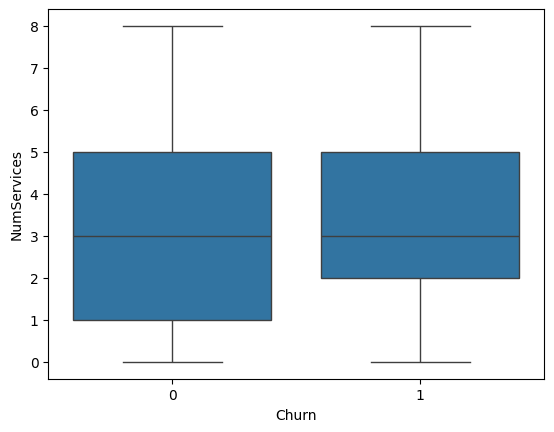

In [14]:
service_cols = ['PhoneService', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
                'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
                'StreamingTV_Yes', 'StreamingMovies_Yes']
df['NumServices'] = df[service_cols].sum(axis=1)

# Histogram
sns.boxplot(x='Churn', y='NumServices', data=df)

### Check for Multicollinearity

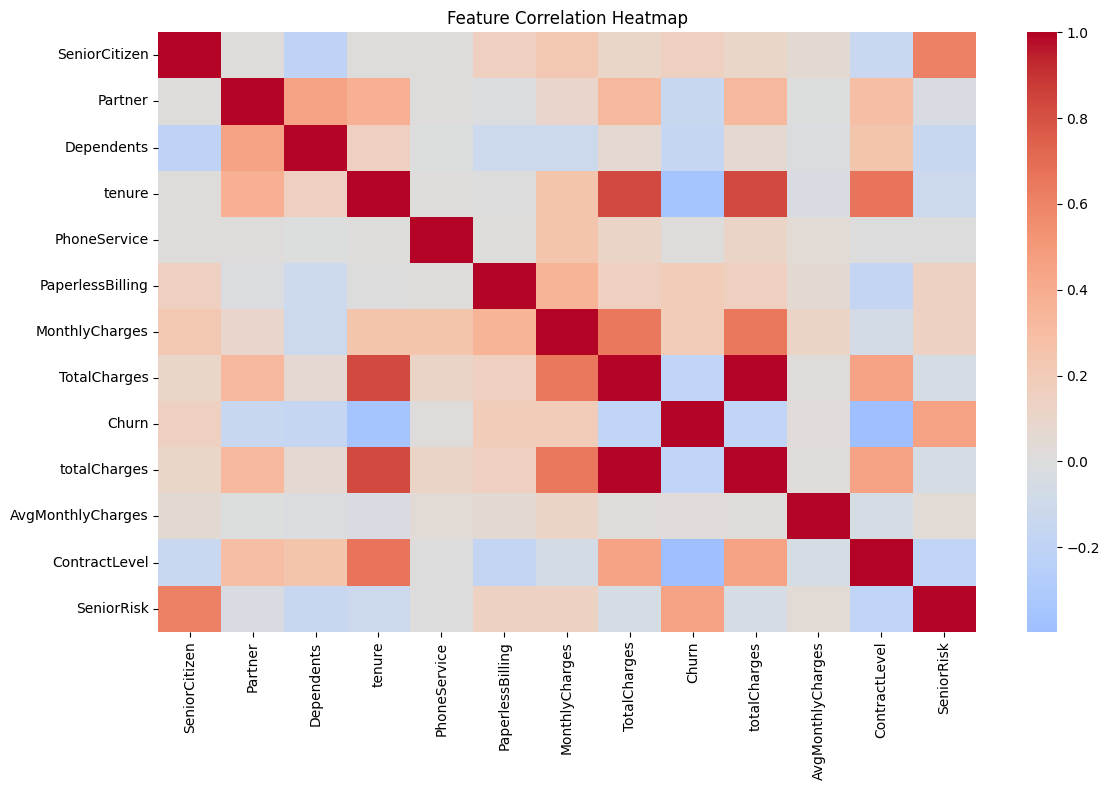

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

### Export Processed Data

In [20]:
processed_path = "/procssed_telco_data.csv"
df.to_csv(processed_path, index=False)